In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/pranavkalikate/Desktop/ALGO/IPL/IPL-First-Innings-Score-Prediction-Deployment-master/ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape

(76014, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [8]:
corr_matrix=df.corr()
corr_matrix

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,1.000000,0.026470,-0.055220,0.002487,0.045320,-0.031886,0.033432,0.049975,0.096586
runs,0.026470,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,-0.055220,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.002487,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282
runs_last_5,0.045320,0.750565,0.242942,0.629374,1.000000,0.058672,0.675924,0.501475,0.368253
wickets_last_5,-0.031886,0.297768,0.693740,0.382850,0.058672,1.000000,-0.214576,-0.421250,-0.273475
striker,0.033432,0.594818,0.019712,0.477508,0.675924,-0.214576,1.000000,0.554439,0.381664
non-striker,0.049975,0.315422,-0.171962,0.236430,0.501475,-0.421250,0.554439,1.000000,0.293233
total,0.096586,0.254498,-0.337343,0.022282,0.368253,-0.273475,0.381664,0.293233,1.000000


/Users/pranavkalikate/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


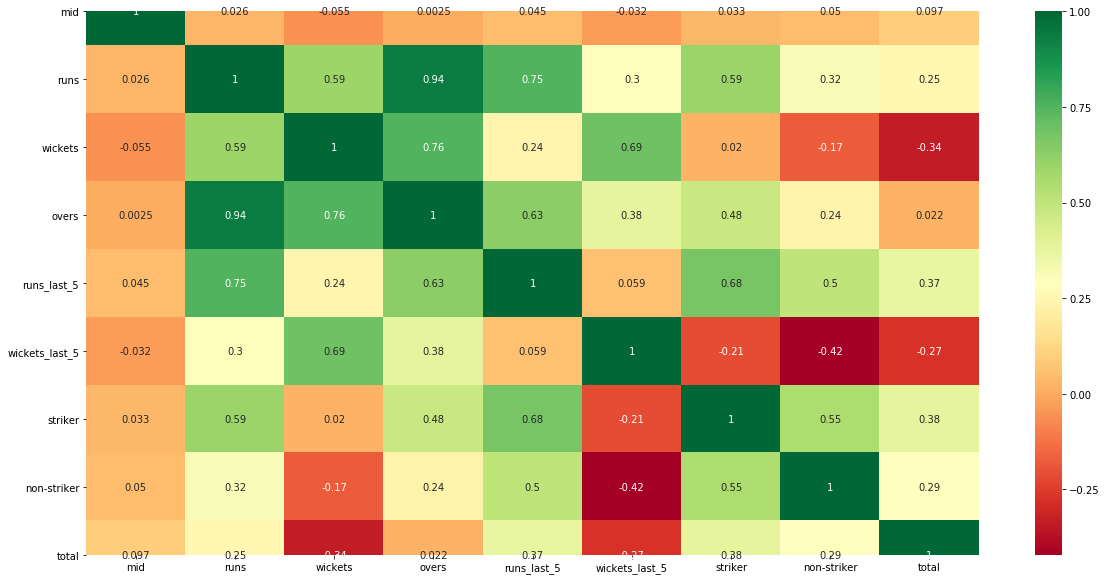

In [9]:
import seaborn as sns
top_corr_features=corr_matrix.index
plt.figure(figsize=((20,10)))
sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn")

In [10]:
#sns.pairplot(df)

In [11]:
#Removing unwanted columns
columns_to_remove=['mid','venue','batsman','bowler','striker','non-striker']

In [12]:
df.drop(labels=columns_to_remove,axis=1, inplace=True)

In [13]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [14]:
df.shape

(76014, 9)

In [15]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [16]:
#Taking only those teams which are present in 2020 IPL
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [17]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [18]:
# Removing the first 5 overs data in every match
# Atleast we require 5 overs of data
df = df[df['overs']>=5.0]

In [19]:
df.shape

(40108, 9)

In [20]:
# Converting the column 'date' from string(object) into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


# --- Data Preprocessing ---



In [22]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [23]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [25]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [26]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [27]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [28]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

ANN Model

In [29]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (37330, 21)
y_train shape:  (37330,)
X_test shape:  (2778, 21)
y_test shape:  (2778,)


In [30]:
# Feature Scaling     #FS is required in Deep Learning
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from utils import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
import tensorflow as tf
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


In [32]:
#early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

In [56]:
model = tf.keras.models.Sequential() #Initialise the ann

#input layer
model.add(Dense(units=32, input_shape=(21,),kernel_initializer='normal', activation='relu')) #input layer
#input_shape= number of features/columns

#output layer
model.add(Dense(units=1,kernel_initializer='normal')) #output layer has no activation function

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_absolute_error']) #Compile

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                704       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, batch_size = 64, epochs = 50,
                       validation_data=(X_test,y_test),verbose=2)


Epoch 1/50
584/584 - 1s - loss: 22244.0352 - mean_absolute_error: 145.8960 - val_loss: 15433.9033 - val_mean_absolute_error: 121.3672
Epoch 2/50
584/584 - 1s - loss: 6414.0078 - mean_absolute_error: 72.0556 - val_loss: 2626.7185 - val_mean_absolute_error: 44.6357
Epoch 3/50
584/584 - 1s - loss: 1143.5829 - mean_absolute_error: 27.0530 - val_loss: 896.5480 - val_mean_absolute_error: 24.1626
Epoch 4/50
584/584 - 1s - loss: 660.5847 - mean_absolute_error: 20.2916 - val_loss: 652.5001 - val_mean_absolute_error: 20.3313
Epoch 5/50
584/584 - 1s - loss: 519.8065 - mean_absolute_error: 17.9271 - val_loss: 513.6714 - val_mean_absolute_error: 17.8863
Epoch 6/50
584/584 - 1s - loss: 432.9134 - mean_absolute_error: 16.2595 - val_loss: 425.0532 - val_mean_absolute_error: 16.2120
Epoch 7/50
584/584 - 1s - loss: 375.0186 - mean_absolute_error: 15.0291 - val_loss: 373.9529 - val_mean_absolute_error: 15.2689
Epoch 8/50
584/584 - 1s - loss: 337.8433 - mean_absolute_error: 14.1621 - val_loss: 336.3414 - 

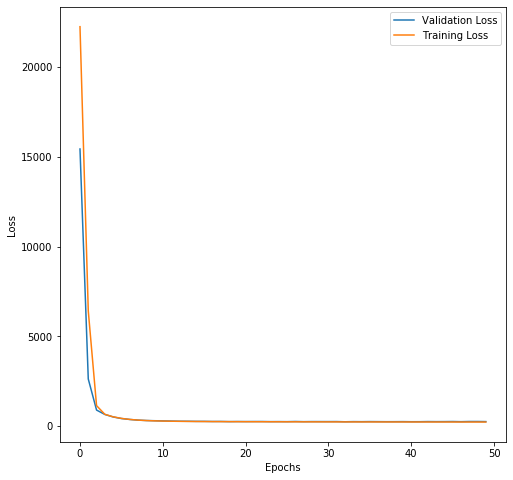

In [59]:
plot_loss(history)

In [60]:
y_pred = model.predict(X_test)

In [61]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#compare y_pred vs y_test

[[176.71 207.  ]
 [180.47 207.  ]
 [179.79 207.  ]
 ...
 [114.26 107.  ]
 [113.38 107.  ]
 [109.83 107.  ]]


In [62]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7488969699484447

In [63]:
from sklearn import metrics
#MAE
print ('MAE is: ', metrics.mean_absolute_error(y_test, y_pred))
#MSE
print ('MSE is: ', metrics.mean_squared_error(y_test, y_pred))
#RMSE
print('RMSE is : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE is:  12.7137238768213
MSE is:  254.41876180406854
RMSE is :  15.950509766276078


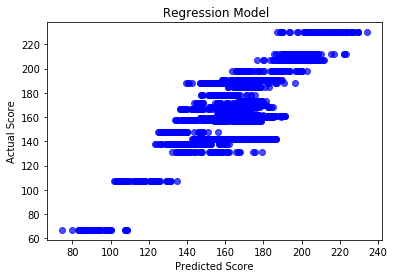

In [64]:
plt.scatter(y_pred, y_test, alpha=.7,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')
plt.title(' Regression Model')
plt.show()

In [65]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

87/87 [==============================] - 0s 1ms/step - loss: 254.4188 - mean_absolute_error: 12.7137
[254.4187774658203, 12.713726997375488]
